In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import *

In [3]:
IBMQ.save_account('85293e025b758b81067db474781bc222ecafbeb6fa88d4dad68b8dcf3bd4c62b392b3e4cc6fa3c3690cab5dde4ab187a7a15b6af028f4ecf7eb6ac0b89b2adb5')

configrc.store_credentials:WARNING:2022-05-25 17:40:49,092: Credentials already present. Set overwrite=True to overwrite.


In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [6]:
num_qubits = 3
circ = QuantumCircuit(num_qubits, num_qubits)
circ.h(range(num_qubits))
circ.measure(range(num_qubits),range(num_qubits))

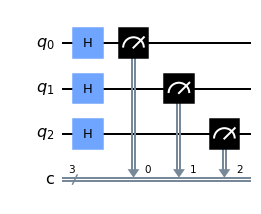

In [7]:
circ.draw('mpl')

In [9]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=8000)
results_sim = job_sim.result()
counts = results_sim.get_counts(circ)
print(counts)

{'111': 125, '101': 141, '000': 138, '001': 125, '010': 141, '011': 110, '110': 130, '100': 114}


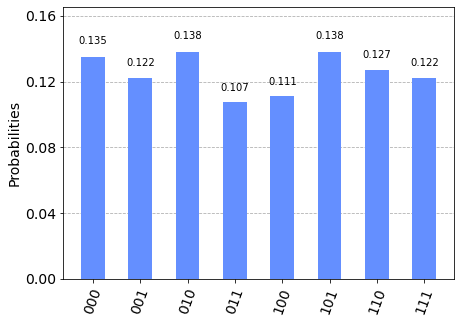

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [13]:
def quantum_random_number_generator(backend):
    
    provider = IBMQ.get_provider()
    backend_sim = provider.get_backend(backend)
    job_sim = execute(circ, backend_sim, shots=1)
    results_sim = job_sim.result()
    counts = results_sim.get_counts(circ)
        
    return int(list(counts.keys())[0], 2)
        

In [14]:
for i in range(10):
    print(quantum_random_number_generator('ibmq_bogota'))

6
1
7
2
2
5
6
1
1
4
